In [ ]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Number of data points
n = 1000

# Generate normal CPU usage for most of the time
cpu_usage_normal = np.random.normal(loc=50, scale=10, size=n)

# Introduce some spikes in CPU usage to simulate anomalies
cpu_usage_anomalies = np.random.normal(loc=80, scale=5, size=50)

# Replace some normal usage with these anomalies
cpu_usage_normal[n//4:n//4 + 50] = cpu_usage_anomalies

# Create a DataFrame
data = pd.DataFrame({
    'cpu_usage': cpu_usage_normal
})

# Save the data to a CSV file
data.to_csv('synthetic_cpu_usage_data.csv', index=False)

print("Synthetic CPU usage data has been generated and saved to 'synthetic_cpu_usage_data.csv'")


Synthetic CPU usage data has been generated and saved to 'synthetic_cpu_usage_data.csv'


In [ ]:
def preprocess_data(data):
    """
    Standardize the data.

    Parameters:
    data (pd.DataFrame): Original data

    Returns:
    np.ndarray: Scaled data
    """
    scaler = StandardScaler()
    return scaler.fit_transform(data)

def train_model(data, contamination=0.1):
    """
    Train the Isolation Forest model.

    Parameters:
    data (np.ndarray): The training data
    contamination (float): The contamination level for the model

    Returns:
    IsolationForest: Trained model
    """
    model = IsolationForest(contamination=contamination)
    model.fit(data)
    return model

def detect_anomalies(model, original_data, scaled_data):
    """
    Use the trained model to detect anomalies.

    Parameters:
    model (IsolationForest): The trained model
    original_data (pd.DataFrame): Original data for anomaly detection
    scaled_data (np.ndarray): Scaled data used for model prediction

    Returns:
    pd.DataFrame: DataFrame with detected anomalies
    """
    original_data['anomaly'] = model.predict(scaled_data)
    return original_data[original_data['anomaly'] == -1]

if __name__ == "__main__":
    # Read the data from the CSV file
    data = read_data_from_csv()

    # Display the first 10 lines
    print("First 10 lines of the data:")
    print(data.head(10))

    # Preprocess data
    scaled_data = preprocess_data(data.copy())  # Important: Make a copy of the original data

    # Train the model
    model = train_model(scaled_data)

    # Detect anomalies
    anomalies = detect_anomalies(model, data.copy(), scaled_data)  # Important: Make a copy of the original data
    print(f"\nAnomalies detected at indices:\n{anomalies.index}")


First 10 lines of the data:
   cpu_usage
0  54.967142
1  48.617357
2  56.476885
3  65.230299
4  47.658466
5  47.658630
6  65.792128
7  57.674347
8  45.305256
9  55.425600

Anomalies detected at indices:
Int64Index([ 13,  37,  49,  74,  79, 110, 113, 125, 179, 209, 220, 221, 234,
            236, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261,
            262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274,
            275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287,
            288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 323,
            374, 378, 382, 420, 429, 431, 442, 471, 478, 525, 544, 561, 566,
            568, 575, 583, 608, 614, 646, 654, 668, 671, 708, 740, 755, 762,
            822, 847, 869, 880, 909, 933, 975, 977, 991],
           dtype='int64')



Anomalies detected at indices:
Int64Index([ 13,  37,  49,  74,  79, 110, 113, 125, 179, 209, 220, 221, 234,
            236, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261,
            262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274,
            275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287,
            288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 323,
            374, 378, 382, 420, 429, 431, 442, 471, 478, 525, 544, 561, 566,
            568, 575, 583, 608, 614, 646, 654, 668, 671, 708, 740, 755, 762,
            822, 847, 869, 880, 909, 933, 975, 977, 991],
           dtype='int64')


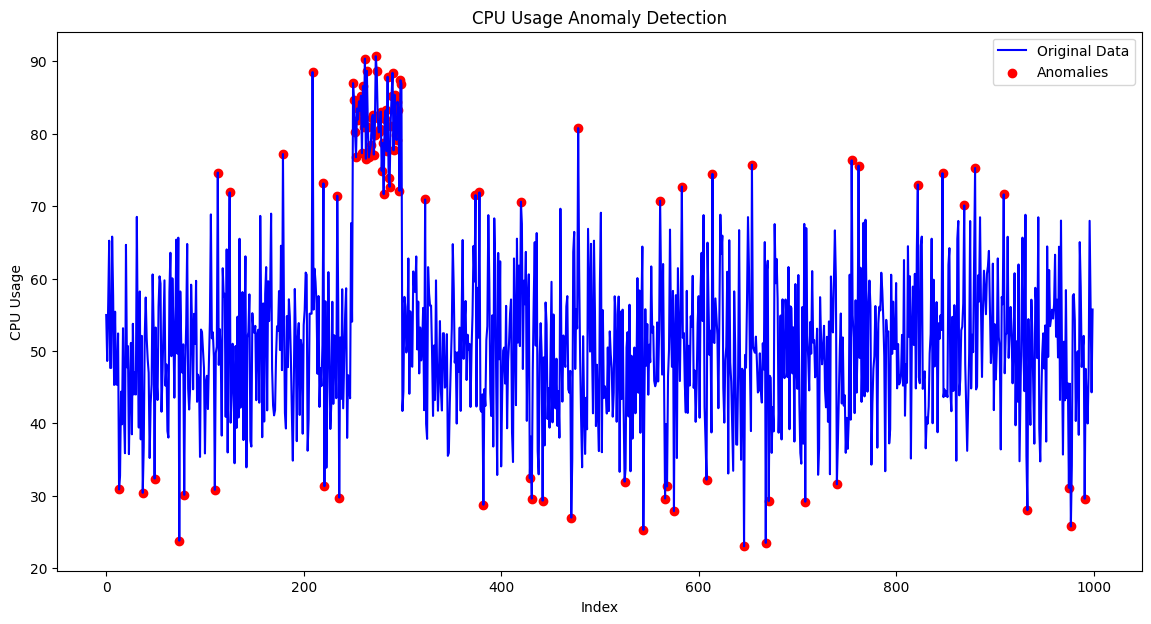

In [ ]:
import matplotlib.pyplot as plt

def plot_anomalies(original_data, anomalies):
    """
    Plot the original data and highlight anomalies.

    Parameters:
    original_data (pd.DataFrame): DataFrame containing the original data
    anomalies (pd.DataFrame): DataFrame containing the anomalies

    """
    plt.figure(figsize=(14, 7))

    # Plot original data
    plt.plot(original_data.index, original_data['cpu_usage'], label='Original Data', color='blue')

    # Highlight anomalies
    plt.scatter(anomalies.index, anomalies['cpu_usage'], color='red', label='Anomalies')

    plt.title('CPU Usage Anomaly Detection')
    plt.xlabel('Index')
    plt.ylabel('CPU Usage')
    plt.legend()

    plt.show()

if __name__ == "__main__":
    # ... (existing code)

    # Detect anomalies
    anomalies = detect_anomalies(model, data.copy(), scaled_data)

    print(f"\nAnomalies detected at indices:\n{anomalies.index}")

    # Plot anomalies on the graph
    plot_anomalies(data, anomalies)
